## Business Problem :
- The business problem for a heart disease prediction project revolves around providing early detection of potential heart conditions, enabling timely interventions and reducing healthcare costs.
- By accurately predicting the likelihood of heart disease, healthcare providers can offer personalized treatment plans, prioritize high-risk patients, and improve overall patient outcomes.
- This can also contribute to reducing the burden on healthcare systems and enhancing preventative care efforts.
- We built a machine learning model for Heart Diesease Prediction based on the historical data.

## Domain Analysis : 
- The heart disease prediction data typically consists of clinical data, including features such as age, gender, blood pressure, cholesterol levels, ECG results, and other indicators of cardiovascular health. 
- The goal is to predict whether a person has heart disease based on these attributes. 
- It is often a classification problem with the target variable being binary (presence or absence of heart disease). 
- The dataset may also include data like resting heart rate, maximum heart rate, and other lifestyle factors, which contribute to the risk of developing heart disease. 
- This dataset can be used to train machine learning models to detect heart disease, and it has significant real-world applications in healthcare, where early detection can lead to better outcomes. 
- Careful analysis of feature importance, data preprocessing, and handling missing values are essential for building an accurate model.
- Additionally, evaluating the model using performance metrics like accuracy, precision, recall, and AUC is crucial for assessing its effectiveness in predicting heart disease risk.

## Task 1 :- Prepare a complete data analysis report on the given data.

In [3]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the input data
input_data = pd.read_csv('values.csv')

# load the output data
output_data = pd.read_csv('labels.csv')

#### Basic checks

In [6]:
# first 5 rows of input data
input_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [7]:
# first 5 rows of output data
output_data.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [8]:
# last 5 rows of input data
input_data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [9]:
# last 5 rows of output data
output_data.tail()

,patient_id,heart_disease_present
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0
179,2nx10r,0


In [10]:
# Shape of both the input and output data
print(input_data.shape, output_data.shape)

(180, 14) (180, 2)


#### Insights :
- Here we see that the row in both the input and output data is equal and patient_id is same in both the tabels. So we can combine both the data table using concate or merge operation if we needed.

In [12]:
# Summary of input data
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

#### Insights :
- Patient_id and thal is categorical column.
- We can convert thal column into numerical column.
- We can remove patient_id because it is not useful to predict the heart diesease.

In [14]:
# summary of descriptive statistics for the numeric columns of input data
input_data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


#### Insights :
- Most patients have an upsloping or flat ST segment during peak exercise (values close to 1 or 2). A smaller proportion of   patients have a downsloping ST segment (value = 3), which is usually more concerning for heart disease.
- The average blood pressure is slightly elevated compared to the normal range (~120 mmHg). Some individuals may have hypertension (>140 mmHg), with a maximum of 180 mmHg.
- Most patients exhibit type 3 (non-anginal pain) or type 4 (asymptomatic) chest pain. Few patients have type 1 (typical angina) or type 2 (atypical angina).
- Most patients have 0 to 1 blocked major vessels, suggesting less severe blockages for the majority. Some patients, however, have up to 3 blocked vessels, indicating severe heart disease.
- About 16% of patients have elevated fasting blood sugar, suggesting possible diabetes or prediabetes.
- The majority of patients have either normal ECG (value = 0) or ST-T wave abnormality (value = 1). Fewer patients show probable or definite left ventricular hypertrophy (value = 2).
- The average cholesterol is elevated, as normal levels are typically below 200 mg/dL. Some patients have extremely high cholesterol (>500 mg/dL), indicating a significant risk factor for heart disease.
- The average ST depression is low, but some patients have significant depression (>2.0), which is often linked to heart problems.
- Around 69% of the patients are male (value = 1), and 31% are female (value = 0).
- The dataset consists of middle-aged to older adults, with most patients in their 50s and 60s.
- The average maximum heart rate is consistent with expected values for middle-aged adults. Some individuals have notably low or high heart rate values, which might indicate abnormal responses during exercise.
- Around 32% of patients experienced angina during exercise, indicating a significant number of individuals with ischemic heart conditions.

- The dataset primarily consists of middle-aged and older individuals, with slightly more males than females.
- Elevated cholesterol, resting blood pressure, and fasting blood sugar are common risk factors.
- While most patients have fewer blocked vessels and low ST depression, a subset shows significant indicators of severe heart disease.
- Chest pain type, ST segment slope, and exercise-induced angina further highlight subsets at higher risk.


In [16]:
# summary of descriptive statistics for the object columns of input data
input_data.describe(include='O')

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


#### Insights :
- Every patient has a unique patient_id. This confirms that there are no duplicate entries in the dataset for patient records.
- Indicates three possible values, likely corresponding to the common thal categories: Normal, Fixed Defect, Reversible Defect. The majority of patients (98 out of 180, or ~54%) have a "Normal" thal value.

In [18]:
# Summary of output data
output_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   patient_id             180 non-null    object
 1   heart_disease_present  180 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [19]:
# summary of descriptive statistics for the object columns of output data
output_data.describe()

,heart_disease_present
count,180.000000
mean,0.444444
std,0.498290
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


#### Insights :
- The dataset contains a nearly balanced representation of patients with and without heart disease.

In [21]:
# Check for value count in output data

output_data.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

#### Insights :
- After value counts we see that the data is not imbalanced, it is nearly balanced.
- So we don't need to balance it.

#### Merge input and output data 

In [24]:
data = pd.merge(input_data, output_data, on='patient_id')

In [25]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


#### Check for missing values and duplicate value

In [27]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [28]:
data.duplicated().sum()

0

#### Insights :
- No missing values or duplicate values in data.

### Exploratory Data Analysis

#### Univariate analysis

In [31]:
# For univariate analysis, separate categorical column and numerical column

categorical_col = ['slope_of_peak_exercise_st_segment', 'thal', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl',	'resting_ekg_results', 'sex', 'exercise_induced_angina']

numerical_col = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']

--- slope_of_peak_exercise_st_segment ---
slope_of_peak_exercise_st_segment
1    93
2    75
3    12
Name: count, dtype: int64


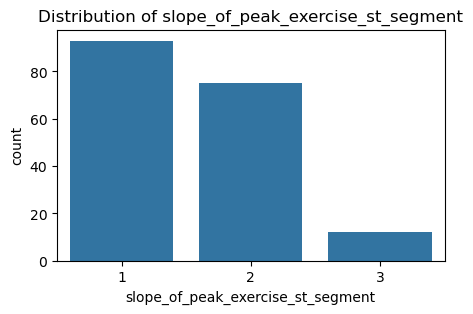

--- thal ---
thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64


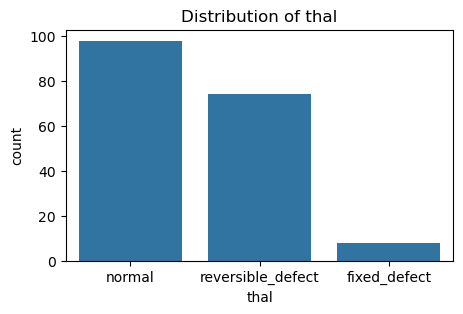

--- chest_pain_type ---
chest_pain_type
4    82
3    57
2    28
1    13
Name: count, dtype: int64


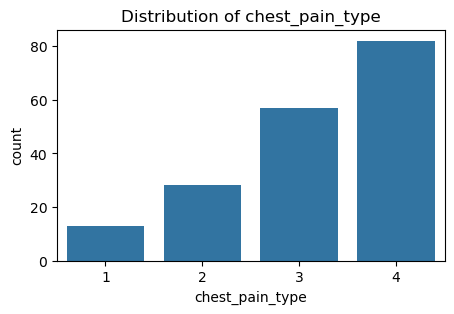

--- num_major_vessels ---
num_major_vessels
0    106
1     37
2     23
3     14
Name: count, dtype: int64


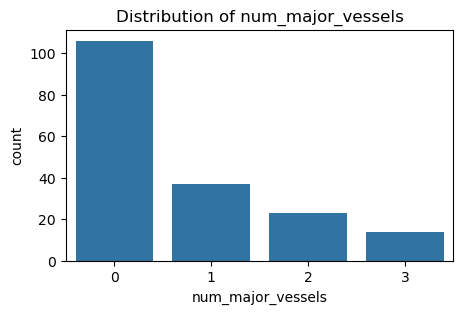

--- fasting_blood_sugar_gt_120_mg_per_dl ---
fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64


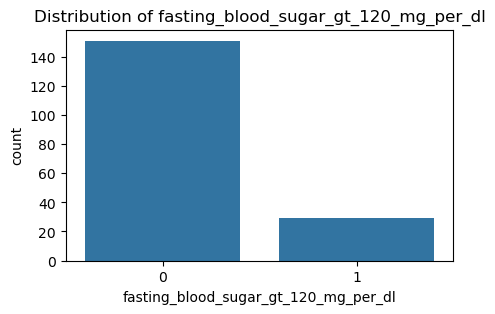

--- resting_ekg_results ---
resting_ekg_results
2    94
0    85
1     1
Name: count, dtype: int64


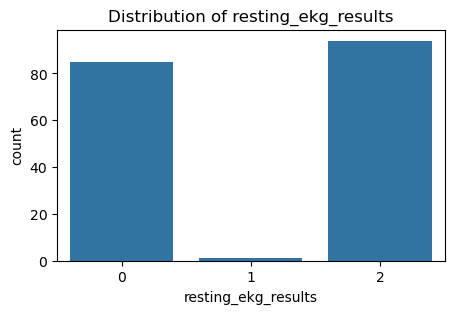

--- sex ---
sex
1    124
0     56
Name: count, dtype: int64


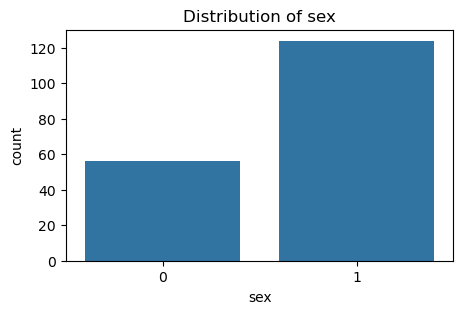

--- exercise_induced_angina ---
exercise_induced_angina
0    123
1     57
Name: count, dtype: int64


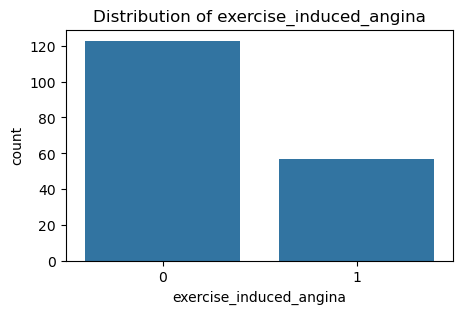

In [32]:
# show the distribution of categorical column using count plot

for col in categorical_col:
    print(f"--- {col} ---")
    print(data[col].value_counts())
    plt.figure(figsize=(5, 3))
    sns.countplot(x = data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

#### Insights :
**(1) slope_of_peak_exercise_st_segment :**<br>
    `Distribution :` The values range from 1 to 3, with the majority (93) having a value of 1, followed by 75 with a value of 2, and only 12 with a value of 3.<br>
    `Insight :` It suggests that most individuals have a slope of 1 or 2, with very few showing a slope of 3. You may need to explore the implications of these categories for heart conditions, as slope could be related to the severity of conditions like exercise-induced ischemia.<br><br>
**(2) thal :**<br>
`Distribution :`
"normal" appears most frequently (98 occurrences), "reversible_defect" has 74 occurrences, "fixed_defect" has 8 occurrences.<br>
`Insight :` This indicates that a majority of patients have a normal thalassemia result, followed by a significant number with reversible defects, and fewer with fixed defects. The category "normal" might be a baseline, and "reversible_defect" may indicate a potentially treatable condition. The rarity of "fixed_defect" could suggest a more severe or permanent condition.<br><br>
**(3) chest_pain_type :**<br>
`Distribution :`
Type 4 is the most common (82 occurrences), followed by Type 3 (57 occurrences), Type 2 (28), and Type 1 (13).<br>
`Insight :` Chest pain types seem to vary with Type 4 being most common. Depending on the dataset, each type might represent varying severities or causes of chest pain. Types 1 and 2 are relatively less frequent, and you could explore the specific characteristics of these patients to determine their significance.<br><br>
**(4) num_major_vessels :**<br>
`Distribution :`
The majority of patients have 0 major vessels affected (106), followed by 1 (37), 2 (23), and 3 (14).<br>
`Insight :` A large portion of the population has no major vessels affected, suggesting that these individuals may have relatively healthier hearts. As the number of vessels increases, the population decreases, which might indicate that as more vessels are affected, the condition becomes rarer or more severe.<br><br>
**(5) fasting_blood_sugar_gt_120_mg_per_dl :**<br>
`Distribution :`
Most patients (151) do not have a fasting blood sugar greater than 120 mg/dl (coded as 0), and only 29 have it (coded as 1).<br>
`Insight :` A clear majority of individuals have fasting blood sugar levels within the normal range, while a smaller percentage have high fasting blood sugar. This may indicate that hyperglycemia is less common but still noteworthy in a subset of the patients.<br><br>
**(6) resting_ekg_results :**<br>
`Distribution :`
The most common category is 2 (94 occurrences), followed by 0 (85), and 1 (1 occurrence).<br>
`Insight :` The majority of patients have a resting electrocardiogram (EKG) result of 2, which likely indicates a specific pattern of heart activity. Very few patients have a result of 1, and the low frequency of this category may indicate a less common or potentially more severe EKG result.<br><br>
**(7) sex :**<br>
`Distribution :`
More males (124) than females (56).<br>
`Insight :` There is a higher number of male patients in the dataset, which is typical in cardiovascular-related studies, as heart disease tends to be more prevalent in men, especially at certain ages.<br><br>
**(8) exercise_induced_angina :**<br>
`Distribution :`
Most individuals (123) do not experience exercise-induced angina (coded as 0), while 57 do (coded as 1).<br>
`Insight :` Exercise-induced angina is less common in this dataset, though the presence of this condition in 57 individuals is significant. Those with this condition could have more severe underlying cardiovascular conditions, which would warrant further investigation.<br>

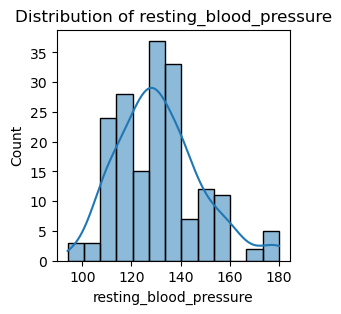

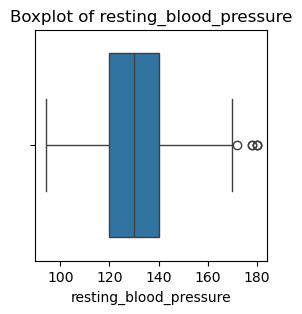

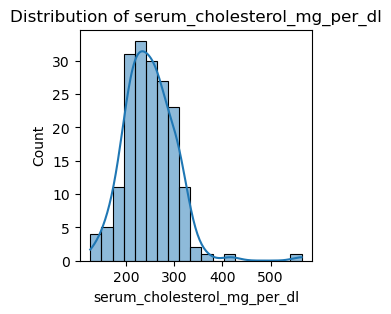

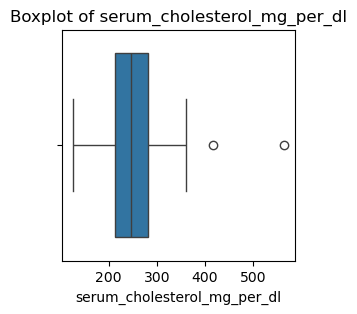

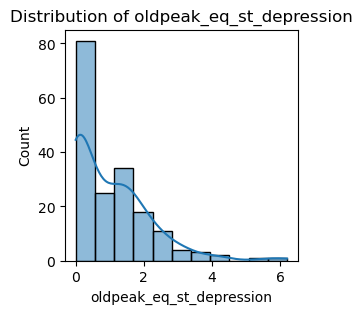

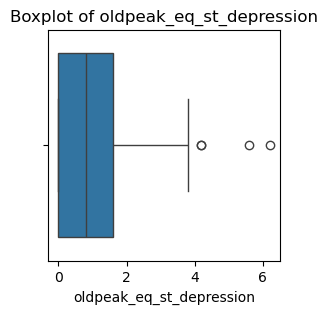

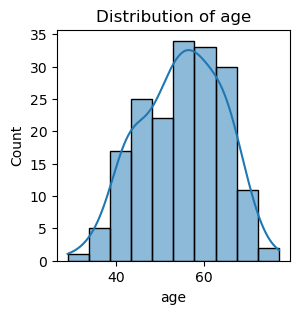

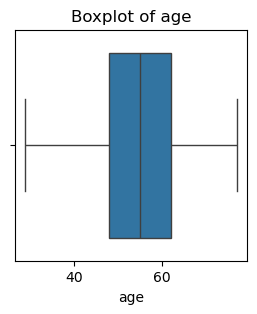

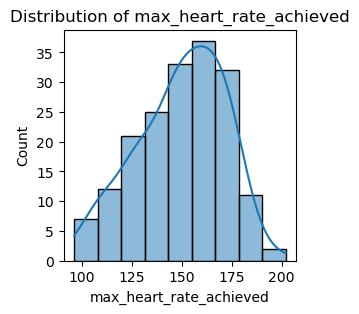

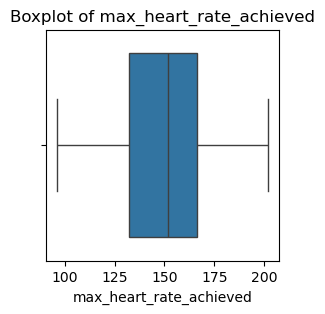

In [34]:
# Show the distribution of numerical column using histplot and boxplot

for col in numerical_col:
    plt.figure(figsize=[3,3])
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=[3,3])
    sns.boxplot(x = data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [35]:
# Skewness and Kurtosis

for col in numerical_col:
    print(f"Skewness and Kurtosis for {col}:")
    print(f"Skewness: {data[col].skew()}, Kurtosis: {data[col].kurt()}")
    print("\n")

Skewness and Kurtosis for resting_blood_pressure:
Skewness: 0.6570798993636248, Kurtosis: 0.47310468283475293


Skewness and Kurtosis for serum_cholesterol_mg_per_dl:
Skewness: 1.2739315506526112, Kurtosis: 6.364424970640193


Skewness and Kurtosis for oldpeak_eq_st_depression:
Skewness: 1.5074124471085, Kurtosis: 3.2427945216449388


Skewness and Kurtosis for age:
Skewness: -0.19916557103159252, Kurtosis: -0.5673461739656789


Skewness and Kurtosis for max_heart_rate_achieved:
Skewness: -0.3937048051980345, Kurtosis: -0.48297052711987565




#### Insights :
**(1) Resting Blood Pressure :**<br>
`Skewness :` Positive skew (right-skewed), indicating more data points on the left with a tail toward higher values.<br>
`Kurtosis :` Slightly positive, suggesting a slightly peaked distribution.<br>
`Action :` Apply transformations like logarithmic or Box-Cox to reduce skewness and make the data more normal, improving model performance.<br><br>
**(2) Serum Cholesterol :**<br>
`Skewness :` Strong positive skew, with many low values and a long tail toward higher values.<br>
`Kurtosis :` High kurtosis, indicating heavy tails and more outliers.<br>
`Action :` Apply log-transformation or robust transformations (e.g., Yeo-Johnson, Box-Cox) to reduce skewness and handle outliers, which can enhance model effectiveness.<br><br>
**(3) Oldpeak :**<br>
`Skewness :` Positive skew (right-skewed).<br>
`Kurtosis :` Slightly above 3, indicating heavier tails and potential outliers.<br>
`Action :` Use log transformation or non-parametric transformations to make the distribution more symmetric, and review the boxplot for outliers.<br><br>
**(4) Age :**<br>
`Skewness :` Close to 0, indicating an approximately normal distribution.<br>
`Kurtosis :` Negative kurtosis, indicating a flatter (platykurtic) distribution with fewer outliers.<br>
`Action :` No transformation is needed since the feature is already fairly normal.<br><br>
**(5) Max Heart Rate :**<br>
`Skewness :` Negative skew (left-skewed), indicating more data points on the higher end with a tail toward lower values.<br>
`Kurtosis :` Negative kurtosis, indicating a relatively flat distribution.<br>
`Action :` No transformation is strictly necessary, but standardizing or normalizing the data can ensure it behaves similarly to other features during modeling.

- After analyzing box-plot, we can show some 2 or 3 outliers in resting_blood_pressure, serum_cholesterol_mg_per_dl and oldpeak_eq_st_depression columns.<br>
- We can not say that this is outliers because in health care domain it is extreme cases, so we also consider those cases.<br>
- So we do not remove those extreme data points.

#### Bivariate analysis

In [39]:
# We have categorical value in 'thal' column
# So first we need to convert this value to numeric for bivariate analysis
# For 'thal' column we can apply oneHot encoding

# Using pandas get_dummies method for oneHot encoding
encoded_thal = pd.get_dummies(data['thal'], prefix='thal', drop_first=True)

# datatype of thal is 'object' so we need to convert it into 'int'
encoded_thal = encoded_thal.astype(int)

# Combine encoded columns with data
data = pd.concat([data, encoded_thal], axis=1)

# Drop original 'thal' column
data.drop('thal', axis=1, inplace=True)

In [40]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,1,0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


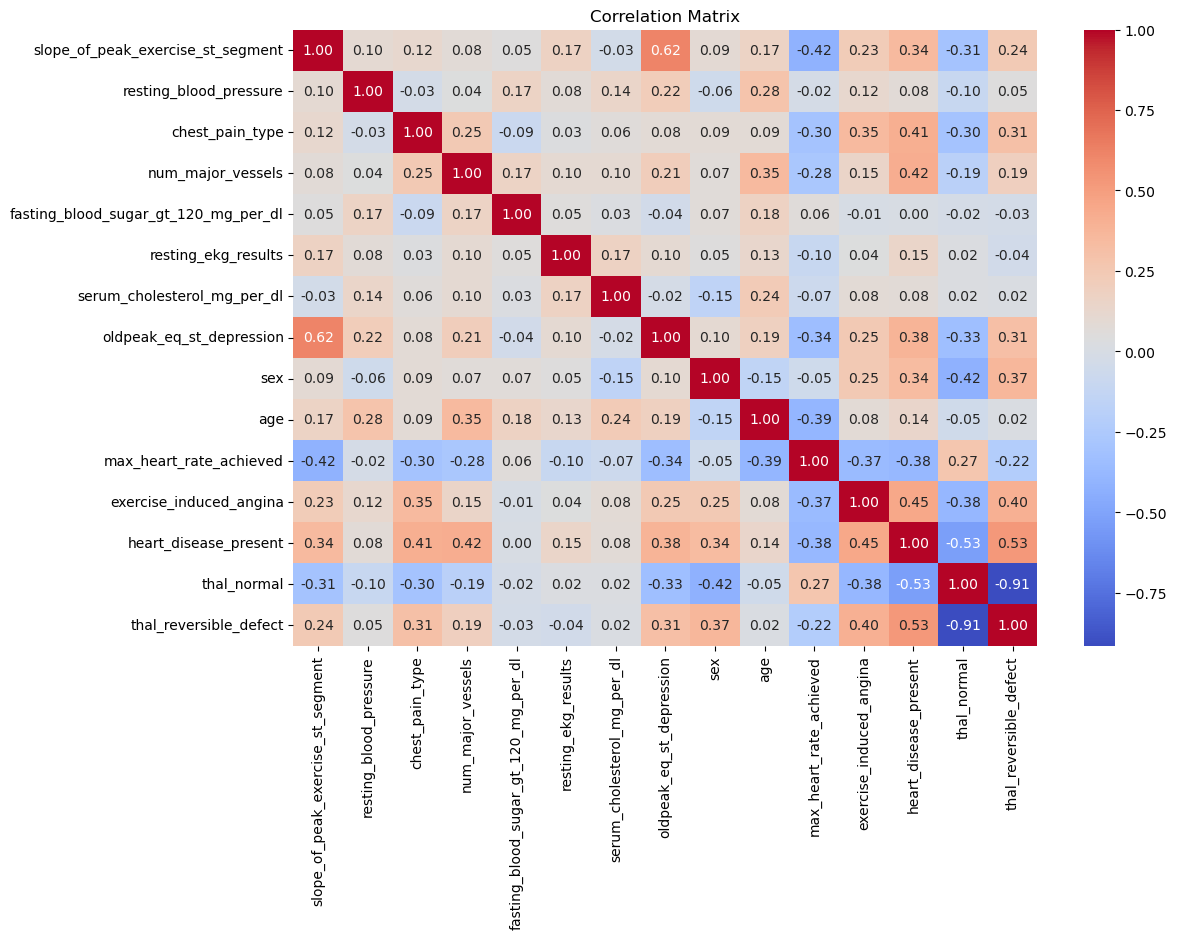

In [41]:
# Correlation matrix

# Drop the 'patient_id' because it is irrelevent, in preprocessing we will delete it 
correlation_matrix = data.drop('patient_id', axis=1).corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#### Insights :
- Max Heart Rate Achieved has a strong negative correlation with Oldpeak (ST Depression) and Exercise Induced Angina, suggesting that those who achieve higher heart rates tend to have lower ST depression and less angina.

- Thal Normal and Thal Reversible Defect have a strong negative correlation, indicating these conditions are largely exclusive of each other.

- Heart Disease Present has moderate positive correlations with Chest Pain Type, Number of Major Vessels, and Oldpeak, indicating these factors may be significant in diagnosing heart disease.

- Slope of Peak Exercise ST Segment shows a moderate positive correlation with Oldpeak, suggesting a link between ST segment slope and depression levels.

- Thal Reversible Defect also correlates moderately with the Number of Major Vessels and Heart Disease Presence, highlighting its potential role in heart disease diagnostics.

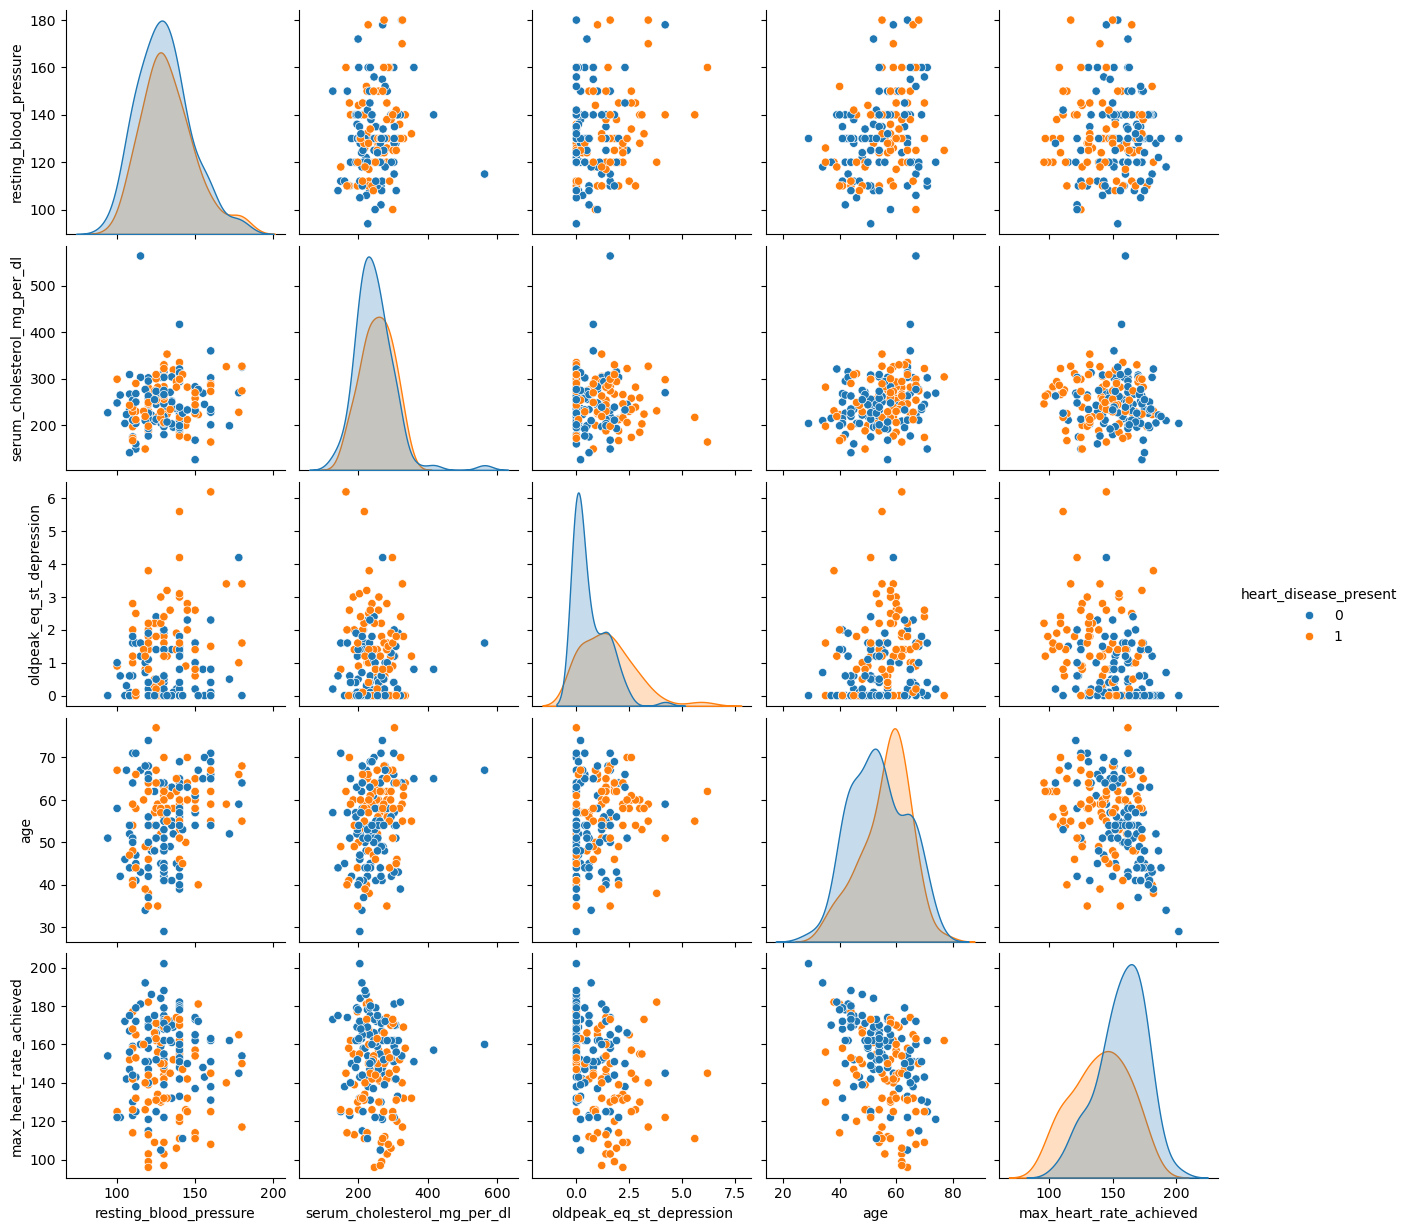

In [43]:
# Visualize the relationships between two numerical variables using pair plot

sns.pairplot(data=data, vars=numerical_col, hue='heart_disease_present')
plt.show()

#### Insights :
**Oldpeak and Presence of Heart Disease :**
- Higher oldpeak values (ST depression) appear to be associated with the presence of heart disease. This could be a significant variable when analyzing its bivariate relationship with other variables.

**Oldpeak and Max Heart Rate Achieved :** 
- There's a slight indication that individuals with heart disease tend to have lower maximum heart rates and higher oldpeak values. Analyzing these two variables together might reveal more about their combined effect.

**Resting Blood Pressure and Serum Cholesterol :**
- These two variables show overlapping distributions for both classes, suggesting they might not be strong individual predictors. However, their combined effect with other variables could still be worth exploring.

**Age and Heart Disease :**
- There doesn't seem to be a clear separation between age groups in terms of heart disease presence, but analyzing age in conjunction with other variables like oldpeak and max heart rate achieved might provide more insights.

#### Data Preprocessing / Feature Engineering

In [46]:
# Drop patient_id because it doesn't relevent for this problem

data.drop(['patient_id'], axis=1, inplace=True)

In [47]:
# check if 'patient_id' removed or not
data.columns

Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present', 'thal_normal', 'thal_reversible_defect'],
      dtype='object')

In [48]:
# Apply Log-transform on columns 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression'

data['resting_blood_pressure'] = np.log(data['resting_blood_pressure'] + 1)
data['serum_cholesterol_mg_per_dl'] = np.log(data['serum_cholesterol_mg_per_dl'] + 1)
data['oldpeak_eq_st_depression'] = np.log(data['oldpeak_eq_st_depression'] + 1)

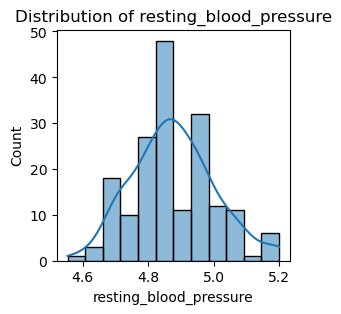

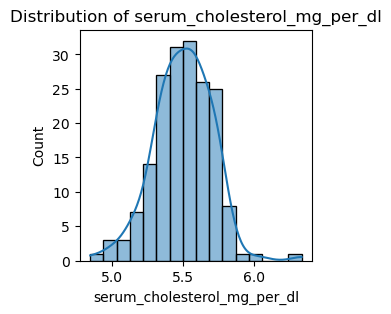

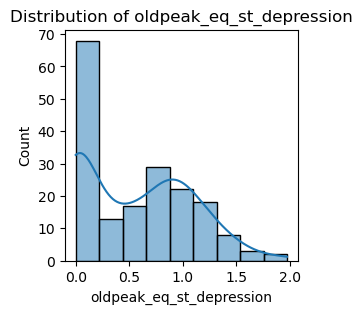

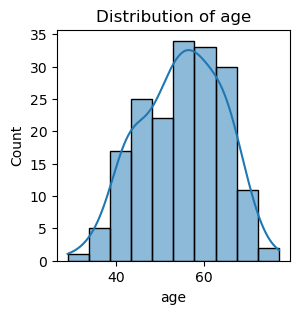

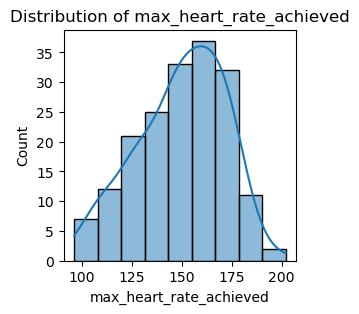

In [49]:
# Check if log-transformation apply or not

for col in numerical_col:
    plt.figure(figsize=[3,3])
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [50]:
# Scale the data for numerical columns
# We don't need to scale categorical variable

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']] = scaler.fit_transform(data[['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved']])

In [51]:
data.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
0,1,-0.138505,2,0,0,2,1.136120,-1.114680,1,-1.053964,0.932485,0,0,1,0
1,2,-1.336276,3,0,0,0,-0.640365,0.772626,0,-0.087134,0.387084,0,0,1,0
2,1,-0.326047,4,3,0,2,1.072302,-1.114680,1,2.383654,0.568884,1,1,1,0
3,1,1.221404,4,0,0,0,-0.439512,-1.114680,1,-1.591092,1.432436,0,1,0,1
4,3,2.472302,1,0,0,2,0.493405,2.141716,1,0.449994,-0.203768,0,0,0,1


In [52]:
# Split data into input and output for model

x = data.drop(['heart_disease_present'], axis=1)
y = data.heart_disease_present

In [53]:
# split data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Task 2 :- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

__In Machine learning, we have many models but we try with few models that are more suitable for classification task.__

#### Model Creation

In [91]:
# Logistic regression model

from sklearn.linear_model import LogisticRegression

# Initialize model
logistic_regression = LogisticRegression()

# Fit the model
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [93]:
# SVC model

from sklearn.svm import SVC

# Initialize model
svc = SVC()

# Fit the model
svc.fit(x_train, y_train)

SVC()

In [95]:
# SVC with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],        # Kernel type
    'degree': [2, 3, 4],               # Degree for polynomial kernel
    'gamma': ['scale', 'auto', 0.1, 1, 10]       # Kernel coefficient
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=sc

In [97]:
# After hyperparameter SVC model

# Initialize model
svc_hyperparameter = SVC(C=1, degree=2, gamma='scale', kernel='rbf')

# Fit the model
svc_hyperparameter.fit(x_train, y_train)

SVC(C=1, degree=2)

In [99]:
# Random forest model

from sklearn.ensemble import RandomForestClassifier

# Initialize model
random_forest = RandomForestClassifier()

# Fit the model
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [101]:
# Randomforest with hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters distribution
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(range(10, 50, 10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

# Best hyperparameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Cross-validation Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 171}
Best Cross-validation Accuracy: 0.8480295566502463


In [103]:
# After hyperparameter Randomforest model

# Initialize model
random_forest_hyperparameter = RandomForestClassifier(bootstrap=True, max_depth=30, min_samples_leaf=8, min_samples_split=8, n_estimators=171)

# Fit the model
random_forest_hyperparameter.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=171)

In [105]:
# Naive bayes model

from sklearn.naive_bayes import GaussianNB

# Initialize model
naive_bayes = GaussianNB()

# Fit the model
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [107]:
# Gradient boosting model

from sklearn.ensemble import GradientBoostingClassifier

# Initialize model
gradient_boosting = GradientBoostingClassifier()

# Fit the model
gradient_boosting.fit(x_train, y_train)

GradientBoostingClassifier()

In [109]:
# Gradient boosting with hyperparameter tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8333333333333334


In [111]:
# After hyperparameter Gradient boosting model

# Initialize model
gradient_boosting_hyperparameter = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=0.8)

# Fit the model
gradient_boosting_hyperparameter.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=300,
                           subsample=0.8)

In [113]:
# KNN model

from sklearn.neighbors import KNeighborsClassifier

# Initialize model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(x_train, y_train)

KNeighborsClassifier()

__Evaluate all models with evaluation matrics__

In [116]:
# Import classification_report form sklearn.metrics 
from sklearn.metrics import classification_report

models = {
    'Logistic Regression' : logistic_regression,
    'SVC' : svc,
    'SVC Hyperparameter' : svc_hyperparameter,
    'Random Forest' : random_forest,
    'Random Forest Hyperparameter' : random_forest_hyperparameter,
    'Naive Bayes' : naive_bayes,
    'Gradient Boosting' : gradient_boosting,
    'Gradient Boosting Hyperparameter' : gradient_boosting_hyperparameter,
    'KNN' : knn
}

# Analyse classification report for all the models

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print('*' * 54)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36

******************************************************
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36

******************************************************
SVC Hyperparameter Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1   

In [118]:
# Try to analyze different parameters of evaluation matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model_performance(models, x_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(x_test)
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
        print(f"Precision: {precision_score(y_test, y_pred):.2f}")
        print(f"Recall: {recall_score(y_test, y_pred):.2f}")
        print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print('*' * 25)

evaluate_model_performance(models, x_test, y_test)

Model: Logistic Regression
Accuracy: 0.83
Precision: 0.94
Recall: 0.75
F1 Score: 0.83
Confusion Matrix:
 [[15  1]
 [ 5 15]]
*************************
Model: SVC
Accuracy: 0.83
Precision: 1.00
Recall: 0.70
F1 Score: 0.82
Confusion Matrix:
 [[16  0]
 [ 6 14]]
*************************
Model: SVC Hyperparameter
Accuracy: 0.83
Precision: 1.00
Recall: 0.70
F1 Score: 0.82
Confusion Matrix:
 [[16  0]
 [ 6 14]]
*************************
Model: Random Forest
Accuracy: 0.86
Precision: 1.00
Recall: 0.75
F1 Score: 0.86
Confusion Matrix:
 [[16  0]
 [ 5 15]]
*************************
Model: Random Forest Hyperparameter
Accuracy: 0.86
Precision: 1.00
Recall: 0.75
F1 Score: 0.86
Confusion Matrix:
 [[16  0]
 [ 5 15]]
*************************
Model: Naive Bayes
Accuracy: 0.83
Precision: 0.94
Recall: 0.75
F1 Score: 0.83
Confusion Matrix:
 [[15  1]
 [ 5 15]]
*************************
Model: Gradient Boosting
Accuracy: 0.75
Precision: 0.82
Recall: 0.70
F1 Score: 0.76
Confusion Matrix:
 [[13  3]
 [ 6 14]]


In [71]:
# To measure sensitivity of model check recall score for all model

def evaluate_recall(model, x_test, y_test):
    y_pred = model.predict(x_test)
    return recall_score(y_test, y_pred)

print("Logistic Regression Recall :", evaluate_recall(logistic_regression, x_test, y_test))
print("SVC Recall :", evaluate_recall(svc, x_test, y_test))
print("SVC Hyperparameter Recall :", evaluate_recall(svc_hyperparameter, x_test, y_test))
print("Random Forest Recall :", evaluate_recall(random_forest, x_test, y_test))
print("Random Forest Hyperparameter Recall :", evaluate_recall(random_forest_hyperparameter, x_test, y_test))
print("Naive Bayes Recall :", evaluate_recall(naive_bayes, x_test, y_test))
print("Gradient Boosting Recall :", evaluate_recall(gradient_boosting, x_test, y_test))
print("Gradient Boosting Hyperparameter Recall :", evaluate_recall(gradient_boosting_hyperparameter, x_test, y_test))
print("KNN Recall :", evaluate_recall(knn, x_test, y_test))

Logistic Regression Recall : 0.75
SVC Recall : 0.7
SVC Hyperparameter Recall : 0.75
Random Forest Recall : 0.7
Random Forest Hyperparameter Recall : 0.75
Naive Bayes Recall : 0.75
Gradient Boosting Recall : 0.7
Gradient Boosting Hyperparameter Recall : 0.7
KNN Recall : 0.7


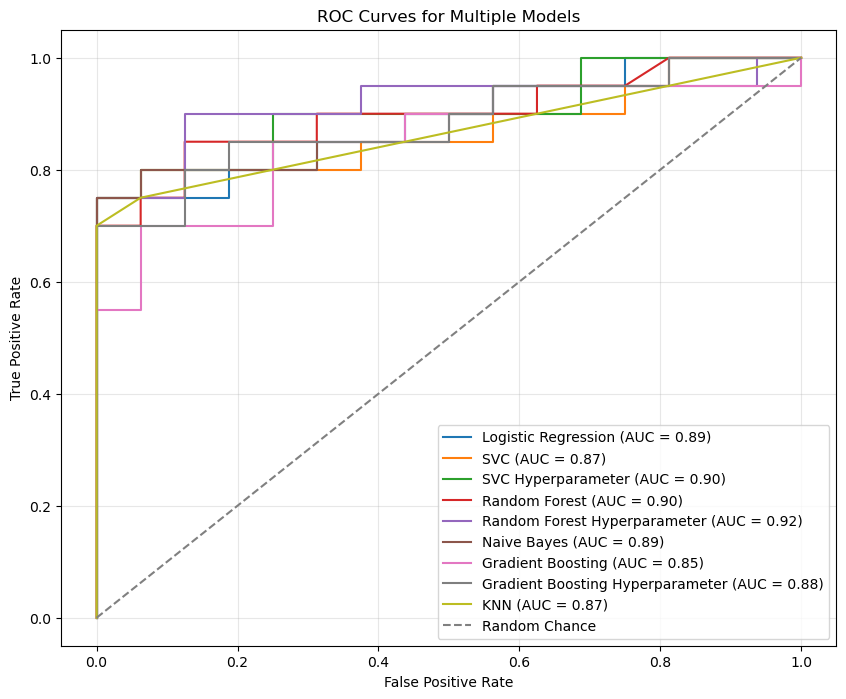

In [72]:
# Compare models with roc curve

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Get predicted probabilities
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(x_test)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot diagonal (random chance)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Chance")

# Add labels and legend
plt.title("ROC Curves for Multiple Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

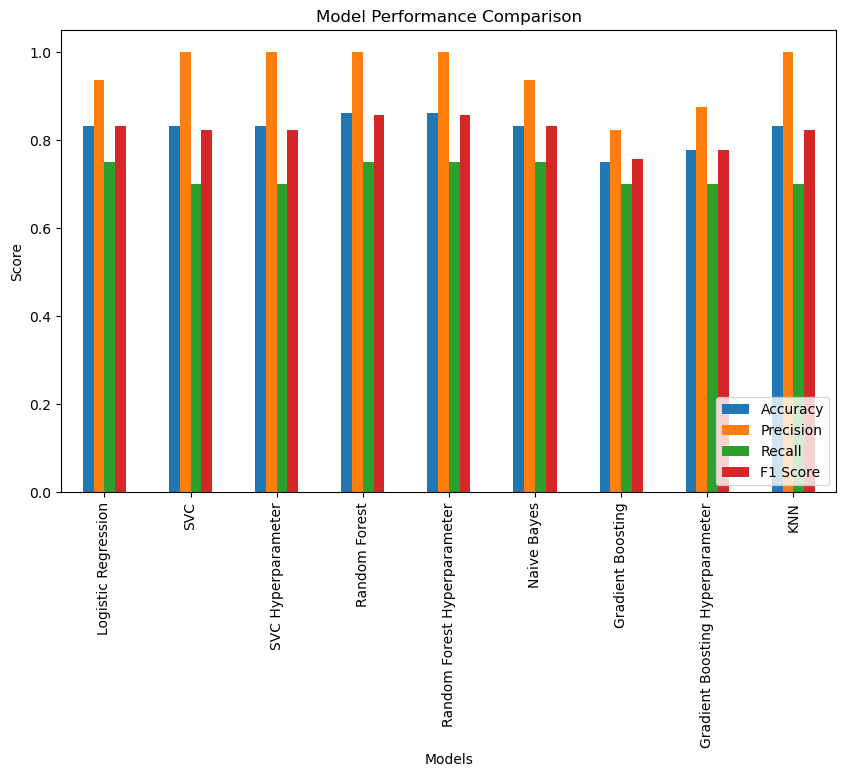

In [120]:
def plot_model_comparison(models, x_test, y_test):
    metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}
    model_names = []
    
    for name, model in models.items():
        y_pred = model.predict(x_test)
        metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["Precision"].append(precision_score(y_test, y_pred))
        metrics["Recall"].append(recall_score(y_test, y_pred))
        metrics["F1 Score"].append(f1_score(y_test, y_pred))
        model_names.append(name)

    metrics_df = pd.DataFrame(metrics, index=model_names)
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.xlabel("Models")
    plt.legend(loc="lower right")
    plt.show()

plot_model_comparison(models, x_test, y_test)

## Task 3 :- Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats.

To improve heart disease predictions and prevent life-threatening situations, hospitals can adopt several key strategies :

**(1) Implement Early Screening Programs :** 
- Hospitals should prioritize regular heart disease screenings for at-risk populations, such as individuals with a family history or other risk factors like obesity, smoking, and high blood pressure.
- Early detection can significantly improve prognosis.

**(2) Leverage Advanced Machine Learning Models :** 
- Hospitals can use advanced machine learning algorithms to analyze patient data and predict heart disease risk more accurately.
- These models can learn from vast datasets, considering numerous factors like age, lifestyle, and biomarkers.

**(3) Enhance Data Integration :** 
- Integrating data from various sources—such as patient medical records, wearable health devices, and genetic information—can provide a holistic view of an individual’s heart health, enabling better predictions and personalized care plans.

**(4) Adopt Predictive Analytics :** 
- By utilizing predictive analytics, hospitals can identify high-risk patients earlier, enabling timely intervention.
- Hospitals should invest in real-time monitoring systems that alert healthcare providers to potential issues before they become critical.

**(5) Educate and Empower Patients :** 
- Hospitals can offer educational programs to raise awareness about heart disease prevention, focusing on lifestyle changes like healthy eating, regular exercise, and smoking cessation.
- Engaging patients in their health management can lead to improved long-term outcomes.

**(6) Collaborate with Specialists :** 
- Hospitals should create interdisciplinary teams, including cardiologists, data scientists, and nutritionists, to work together in identifying risk factors and creating targeted prevention strategies for patients.

**(7) Improve Follow-Up Systems :** 
- A robust follow-up system is essential to monitor patients who are at high risk or already diagnosed with heart disease.
- Regular check-ins, along with medication adherence monitoring, can prevent complications.

**(8) Invest in Precision Medicine :** 
- By utilizing genetic testing and personalized medicine, hospitals can tailor treatments and prevention strategies to individual patients, increasing the effectiveness of interventions and reducing unnecessary treatments.

**(9) Upgrade IT Infrastructure :** 
- Hospitals need to upgrade their IT infrastructure to handle large datasets efficiently and securely, ensuring that predictive models are built on accurate, real-time data for timely decision-making.

**(10) Encourage Preventative Care :** 
- Hospitals should incentivize preventative care through regular check-ups and screenings, especially for individuals with multiple risk factors.
- Prevention is far more effective and cost-efficient than treating advanced heart disease.

By embracing these strategies, hospitals can significantly enhance their heart disease prediction capabilities, leading to earlier interventions, improved patient outcomes, and potentially saving lives.
<br><br><br>


# **Model Comparison Report**
<br>

# **1. Objective**
The goal of this project is to identify the best machine learning model for predicting heart disease. Multiple models were trained and evaluated using a dataset, with performance measured using standard classification metrics such as accuracy, precision, recall, F1 score, and confusion matrix.  
<br><br>

# **2. Dataset Summary**
- **Number of rows :**  180
- **Number of features :** 14
- **Target variable :** Binary (e.g., 1 = Heart Disease, 0 = No Heart Disease)  
- **Data preprocessing :**  
  - Removed irrelevant or redundant columns.  
  - Categorical variables one-hot encoded.  
  - Skewed features log-transformed for normalization.  
  - Standard Scaling applied to features with varying ranges.  
  <br><br>

# **3. Models Evaluated**
1. Logistic Regression  
2. SVC (Support Vector Classifier)  
3. SVC With Hyperparameter Tuning  
4. Random Forest  
5. Random Forest With Hyperparameter Tuning  
6. Naive Bayes  
7. Gradient Boosting  
8. Gradient Boosting With Hyperparameter Tuning  
9. KNN (K-Nearest Neighbors)

## Evaluation Metrics
The models were evaluated on the following metrics:
- **Accuracy :** Percentage of correctly classified samples.  
- **Precision :** Ratio of true positives to the sum of true positives and false positives.  
- **Recall :** Ratio of true positives to the sum of true positives and false negatives.  
- **F1-Score :** Harmonic mean of precision and recall.  
- **Confusion Matrix :** Provides insight into true positives, false positives, true negatives, and false negatives.  
<br><br>

# **4. Model Performance Summary**

| **Model**                         | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **Confusion Matrix**              |
|------------------------------------|--------------|---------------|------------|--------------|------------------------------------|
| Logistic Regression                | 0.83         | 0.94          | 0.75       | 0.83         | [[15, 1], [5, 15]]                |
| SVC (Support Vector Classifier)    | 0.83         | 1.00          | 0.70       | 0.82         | [[16, 0], [6, 14]]                |
| SVC With Hyperparameter Tuning     | 0.83         | 1.00          | 0.70       | 0.82         | [[16, 0], [6, 14]]                |
| Random Forest                      | 0.86         | 1.00          | 0.75       | 0.86         | [[16, 0], [5, 15]]                |
| Random Forest With Hyperparameter  | 0.86         | 1.00          | 0.75       | 0.86         | [[16, 0], [5, 15]]                |
| Naive Bayes                        | 0.83         | 0.94          | 0.75       | 0.83         | [[15, 1], [5, 15]]                |
| Gradient Boosting                  | 0.75         | 0.82          | 0.70       | 0.76         | [[13, 3], [6, 14]]                |
| Gradient Boosting With Hyperparameter Tuning | 0.78 | 0.88          | 0.70       | 0.78         | [[14, 2], [6, 14]]                |
| KNN (K-Nearest Neighbors)          | 0.83         | 1.00          | 0.70       | 0.82         | [[16, 0], [6, 14]]                |

<br>

# **5. Analysis and Insights**
1. `Logistic Regression and SVC :`
   - Both models show strong precision (Logistic Regression: 0.94, SVC: 1.00), but they miss a portion of the positive cases, as indicated by their recall values (Logistic Regression: 0.75, SVC: 0.70).
   - Logistic Regression has a balanced F1-score (0.83), while SVC has a slightly lower F1-score (0.82), as it tends to focus more on precision.
   
2. `Random Forest and KNN :`
   - Both models perform well in terms of precision (1.00) and accuracy (0.86), but the recall value of 0.75 indicates they miss some true positives.
   - Random Forest's F1-score of 0.86 is higher, making it the more balanced model for heart disease detection.

3. `Naive Bayes :`
   - Achieves a well-balanced precision of 0.94 and recall of 0.75, making it a reliable model with an F1-score of 0.83, which is comparable to Logistic Regression.

4. `Gradient Boosting (with and without Hyperparameter Tuning) :`
   - Gradient Boosting's precision is lower (0.82) compared to other models, but it still delivers a reasonable recall of 0.70.
   - The F1-score is slightly lower than Logistic Regression and Random Forest, but tuning helps improve it slightly.

<br>

# **6. Recommendation**
Based on the performance metrics, **Random Forest** is the recommended model for predicting heart disease.

### Reasons for Choosing Random Forest :
- Achieves the highest **accuracy** (0.86) and **F1-score** (0.86), indicating it balances precision and recall effectively.
- Its **precision** of 1.00 and **recall** of 0.75 make it an excellent choice for minimizing both false positives and false negatives.
- Random Forest is a reliable and robust model for real-world applications where balanced performance is required.

<br><br><br>


# **Report on Challenges Faced**

## **1. Introduction**

This report documents the challenges faced and solutions implemented during the heart disease prediction project. The project aimed to predict heart disease using a medical dataset containing various clinical features. Addressing these challenges required careful preprocessing, feature engineering, and model optimization techniques to ensure robust predictions.

## **2. Challenges and Solutions**

**Challenge 1 : Input and Output Data in Different Files**  
- **Problem :** The input and output data were located in different files, which posed a challenge for aligning them correctly for analysis.  
- **Solution :**  
  - Merged the data based on the patient_id column to align both input and output data, ensuring correct alignment for exploratory data analysis (EDA). This step was crucial for preventing data mismatches during analysis.

**Challenge 2 : Irrelevant Patient ID Column**  
- **Problem :** The patient_id column did not contribute to predicting heart disease and could add unnecessary complexity.  
- **Solution :**  
  - Dropped the patient_id column as it did not provide useful predictive information, simplifying the dataset and reducing complexity.

**Challenge 3 : Categorical 'thal' Column**  
- **Problem :** The 'thal' column was categorical, which is not suitable for use in machine learning models without transformation.  
- **Solution :**  
  - Applied one-hot encoding to the 'thal' column to convert categorical values into a numerical format, making it usable for statistical and machine learning models.

**Challenge 4 : Non-Normal Distribution of Columns**  
- **Problem :** Several columns, such as 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl', and 'oldpeak_eq_st_depression', were not normally distributed, which could affect model performance.  
- **Solution :**  
  - Applied a log transformation to these columns to address positive skewness and approximate a normal distribution. Afterward, the distribution was checked to confirm improvements in normality.

**Challenge 5 : Features with Different Ranges**  
- **Problem :** Features with different ranges made the model sensitive to scale, potentially leading to skewed predictions.  
- **Solution :**  
  - Used Standard Scaling to normalize these features, ensuring that all features had a mean of 0 and a standard deviation of 1. This was particularly important for models like SVM and KNN, which are sensitive to data scale.

**Challenge 6 : Unclear Column Meanings and Encoding Types**  
- **Problem :** The meanings of some columns were unclear, and determining their encoding type (ordinal or nominal) was necessary for proper analysis.  
- **Solution :**  
  - Conducted research on the columns using domain references and data dictionaries to understand their meaning and properly categorize and encode them for analysis.

**Challenge 7 : Limited Data Leading to Poor Model Performance**  
- **Problem :** The limited dataset resulted in poor model performance and overfitting.  
- **Solution :**  
  - Experimented with different models and applied hyperparameter tuning to improve performance. This included using techniques like cross-validation and model regularization to prevent overfitting.

## **3. Results and Key Observations**

- **Data Alignment :** Merging input and output data correctly was crucial to ensure no data mismatch during analysis.  
- **Feature Engineering :** Dropping irrelevant columns and transforming categorical variables improved the dataset’s quality for modeling.  
- **Model Improvement :** Standard scaling and log transformations helped in improving model stability and performance.  
- **Handling Limited Data :** Hyperparameter tuning and model experimentation contributed to better predictive accuracy.

## **4. Conclusion**

The heart disease prediction project faced challenges related to data alignment, feature engineering, and data distribution. These challenges were successfully addressed through careful preprocessing and model optimization techniques. The project highlights the importance of data preparation and model selection in achieving reliable predictions for health-related outcomes.
<br><br><br>

## **NOTE :** 
- Running this code multiple times may yield different outputs and accuracy values.
- The results mentioned in the report are based on using 80% of the data for training and the remaining 20% for testing.
- Modifying this ratio (e.g., using a different split between training and testing data) may lead to varying results and accuracy.